In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class IsingSimulation:
    
    def __init__(self, N, T, H):
        '''
        Create an instance of Ising simulation in 2D
        
        Inputs: 
            N (int): the grid size 
            T (float): the temperature of the system
            H (float): the outside magnetic field strength
            
        '''
        self.N = N
        self.T = T
        self.H = H
        #Randomly initialize the state
        self.current_state = np.random.choice([-1,1], size=N**2)
        self.current_state = self.current_state.reshape((N,N))
    
    def set_temperature(self, T):
        '''
        Set the temperature for the system
        
        '''
        self.T = float(T)
            
    def set_temperature(self, H):
        '''
        Set the outside magnetic field for the system
        
        '''
        self.H = float(H)
        
    def viz(self):
        '''
        Visualize the current state
        
        '''
        plt.figure(figsize=(6,6))
        plt.imshow(self.current_state)
        plt.show()
        
    def step(self): 
        '''
        Perform an update for the Ising model. This is essentially a sampling process using 
        the Metropolis-Hasting algorithm with the energy distribution as the target distribution
        a
        '''
        #Only flip one cell at a time
        row = np.random.randint(low=0, high=self.N, size=1)
        col = np.random.randint(low=0, high=self.N, size=1)
        energy = -self.current_state[row, col]*(self.current_state[(row+1)%self.N, col] +\
                                                self.current_state[(row-1)%self.N, col] +\
                                                self.current_state[row, (col+1)%self.N] +\
                                                self.current_state[row, (col+1)%self.N]) 
        energy -= self.H*self.current_state[row, col]
        if np.random.random() < min(1, np.exp(2*energy/self.T)):            
            self.current_state[row, col] = -self.current_state[row, col]
            
    def average_magnetization(self):
        a_mag = np.average(self.current_state.flatten())
        return a_mag

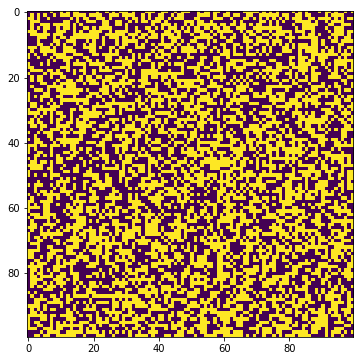

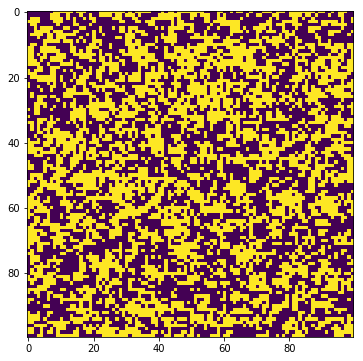

The average magnetization at (appromimately) equilibrium is -0.0154


In [18]:
#High temperature, no magnetic field
sim = IsingSimulation(100, 5, 0)
sim.viz()
for _ in range(100000): 
    sim.step()
sim.viz()
print('The average magnetization at (appromimately) equilibrium is', sim.average_magnetization())

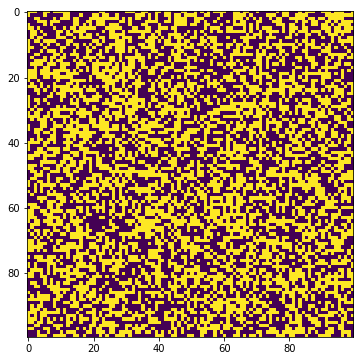

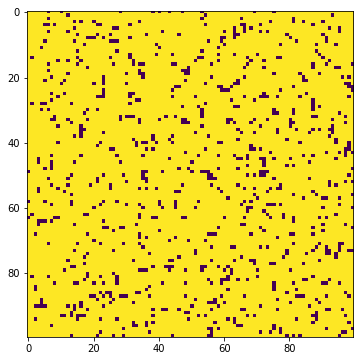

The average magnetization at (appromimately) equilibrium is 0.8356


In [20]:
#High temperature, + magnetic field
sim = IsingSimulation(100, 5, 3)
sim.viz()
for _ in range(100000): 
    sim.step()
sim.viz()
print('The average magnetization at (appromimately) equilibrium is', sim.average_magnetization())

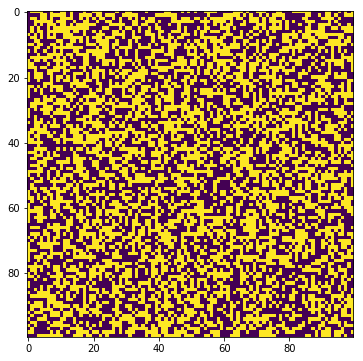

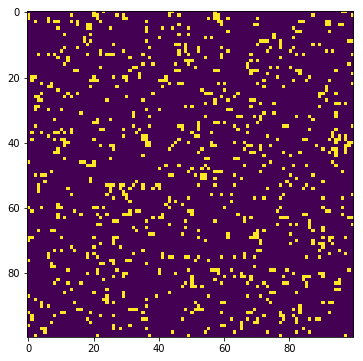

The average magnetization at (appromimately) equilibrium is -0.827


In [21]:
#High temperature, - magnetic field
sim = IsingSimulation(100, 5, -3)
sim.viz()
for _ in range(100000): 
    sim.step()
sim.viz()
print('The average magnetization at (appromimately) equilibrium is', sim.average_magnetization())

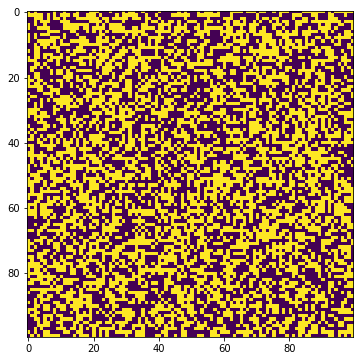

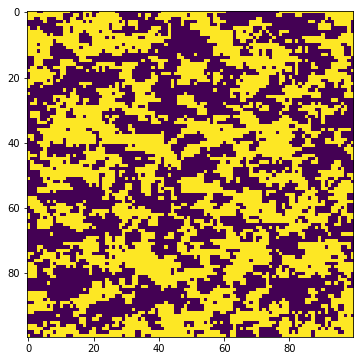

The average magnetization at (appromimately) equilibrium is -0.0036


In [24]:
#Curie temperature, no magnetic field
sim = IsingSimulation(100, 2, 0)
sim.viz()
for _ in range(100000): 
    sim.step()
sim.viz()
print('The average magnetization at (appromimately) equilibrium is', sim.average_magnetization())

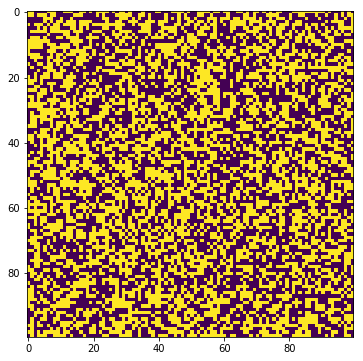

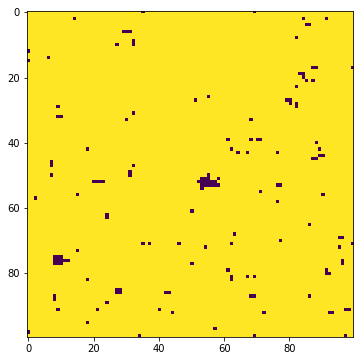

The average magnetization at (appromimately) equilibrium is 0.969


In [26]:
#Curie temperature, + magnetic field
sim = IsingSimulation(100, 2, 1)
sim.viz()
for _ in range(100000): 
    sim.step()
sim.viz()
print('The average magnetization at (appromimately) equilibrium is', sim.average_magnetization())

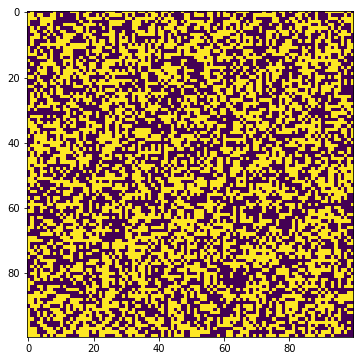

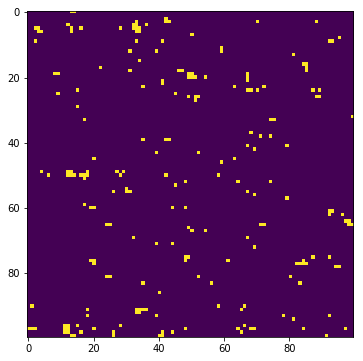

The average magnetization at (appromimately) equilibrium is -0.9564


In [27]:
#Curie temperature, - magnetic field
sim = IsingSimulation(100, 2, -1)
sim.viz()
for _ in range(100000): 
    sim.step()
sim.viz()
print('The average magnetization at (appromimately) equilibrium is', sim.average_magnetization())

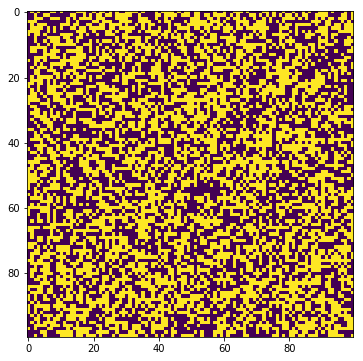

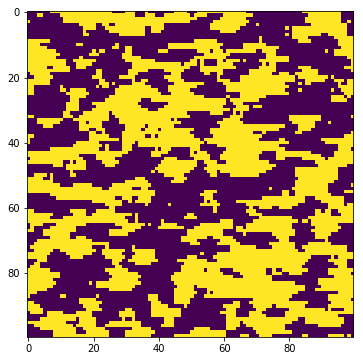

The average magnetization at (appromimately) equilibrium is -0.035


In [46]:
#Low temperature, no magnetic field
sim = IsingSimulation(100, 0.1, 0)
sim.viz()
for _ in range(100000): 
    sim.step()
sim.viz()
print('The average magnetization at (appromimately) equilibrium is', sim.average_magnetization())

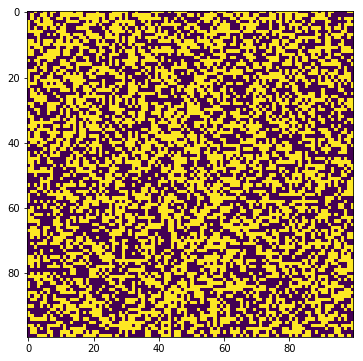

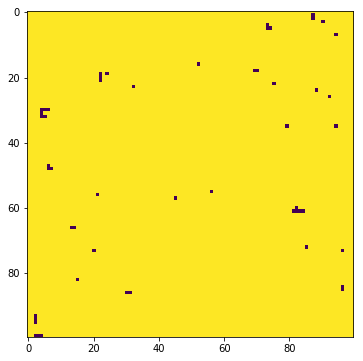

The average magnetization at (appromimately) equilibrium is 0.9894


In [31]:
#Low temperature, + magnetic field
sim = IsingSimulation(100, 1, +1)
sim.viz()
for _ in range(100000): 
    sim.step()
sim.viz()
print('The average magnetization at (appromimately) equilibrium is', sim.average_magnetization())

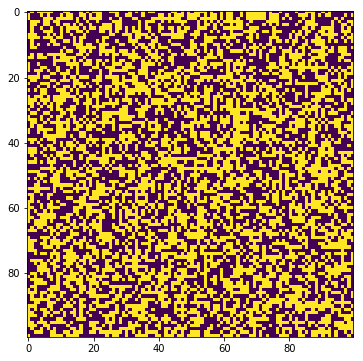

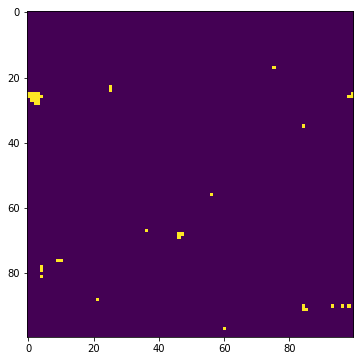

The average magnetization at (appromimately) equilibrium is -0.9922


In [32]:
#Low temperature, - magnetic field
sim = IsingSimulation(100, 1, -1)
sim.viz()
for _ in range(100000): 
    sim.step()
sim.viz()
print('The average magnetization at (appromimately) equilibrium is', sim.average_magnetization())

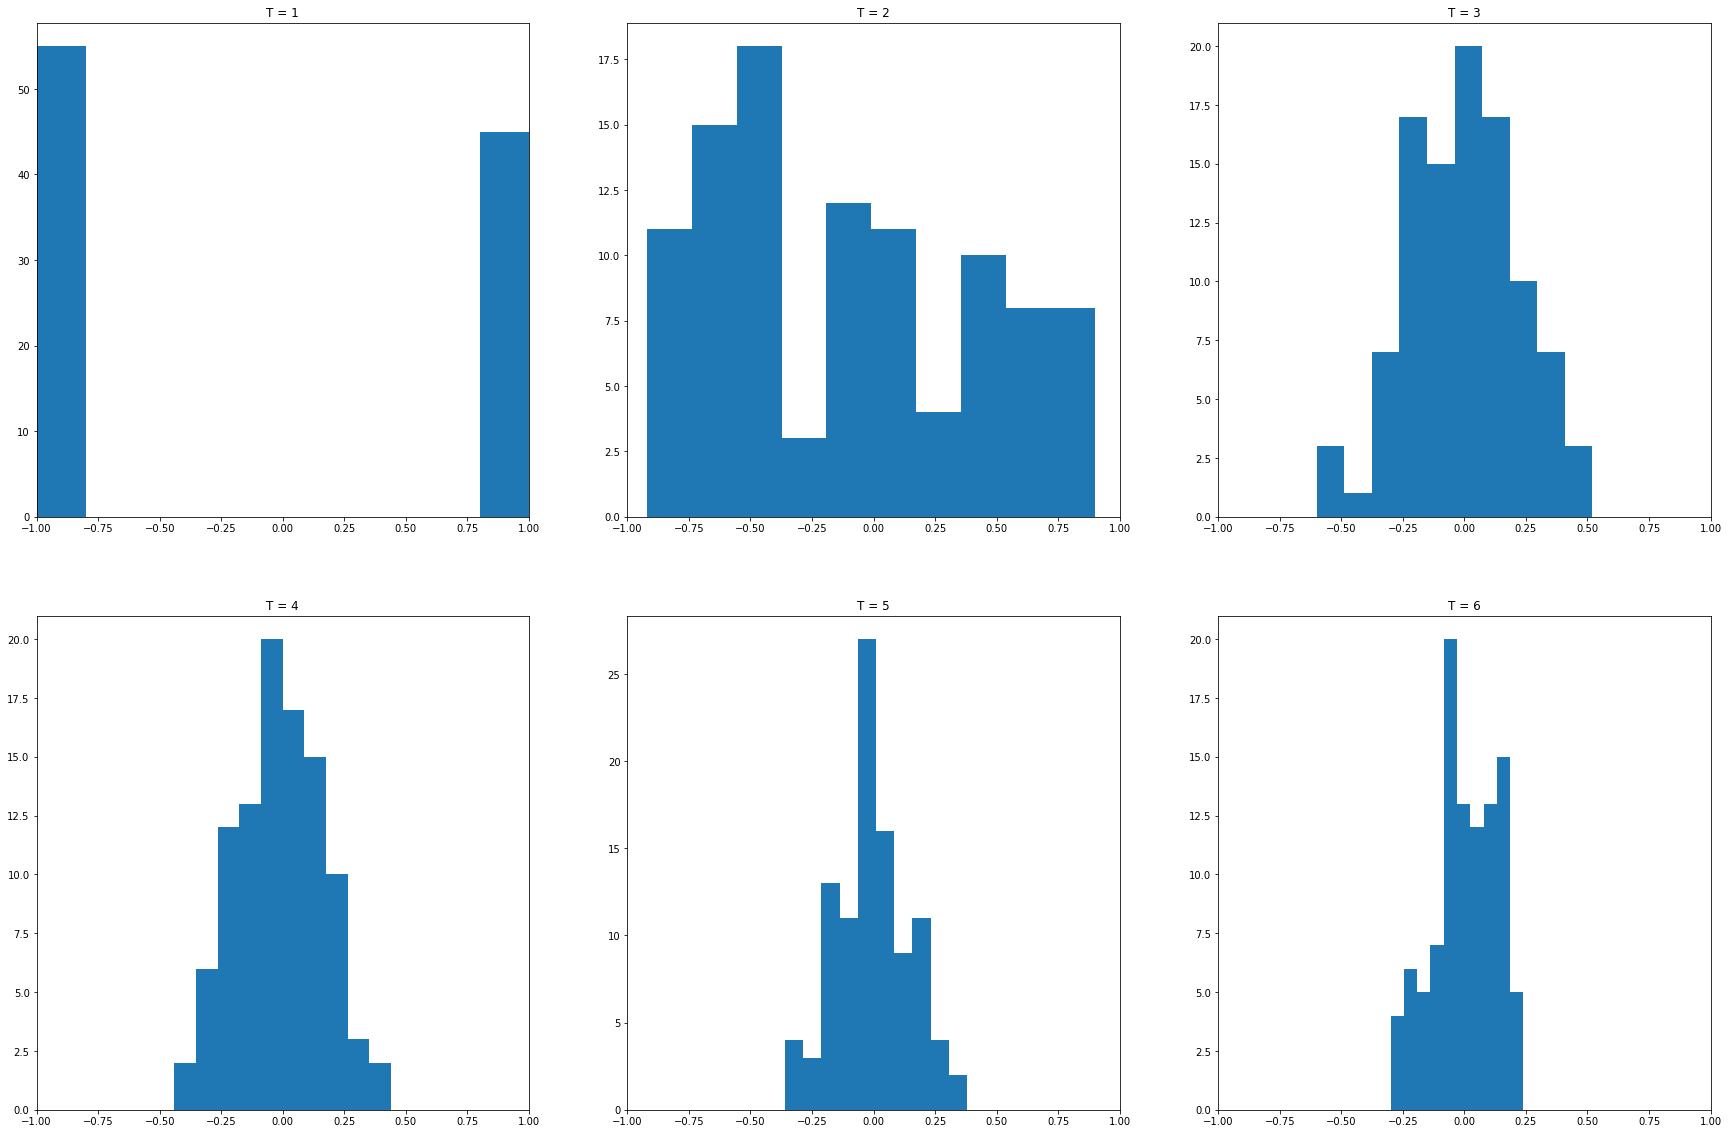

In [56]:
#Histogram
Ts = range(1, 7)
plt.figure(figsize=(30,20))
for T in Ts: 
    a_mag = []
    for _ in range(100): 
        sim = IsingSimulation(10, T, 0)
        for i in range(100000): 
            sim.step()
        a_mag.append(sim.average_magnetization())
    plt.subplot(2,3,T)
    plt.hist(a_mag, bins=10)
    plt.xlim(-1,1)
    plt.title('T = {}'.format(T))
plt.show()

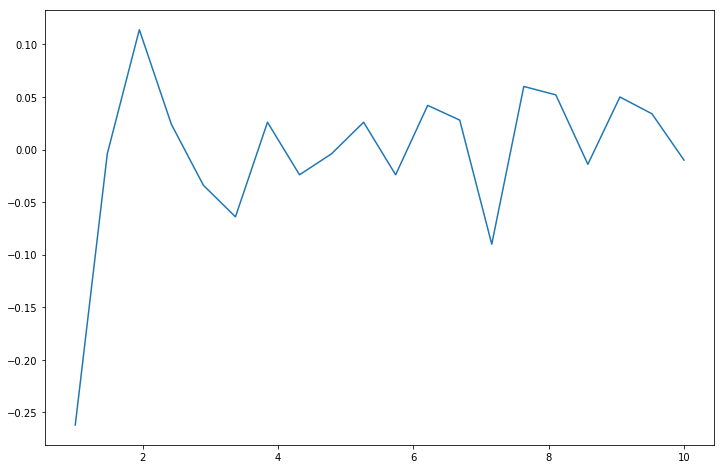

In [55]:
Ts = np.linspace(1,10,20)

plt.figure(figsize=(12,8))
mag = []
for T in Ts: 
    a_mag = []
    for _ in range(10): 
        sim = IsingSimulation(10, T, 0)
        for i in range(10000): 
            sim.step()
        a_mag.append(sim.average_magnetization())
    mag.append(np.mean(a_mag))
plt.plot(Ts, mag)
plt.show()